In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Necessary python package 

import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize, wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud




In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
#Read train and test dataset in csv file from our google shared drive

traindf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_train_data_two.csv')
testdf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_test_data_two.csv')

In [5]:
traindf

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
4419,@MatAshimolowo Someone should please help me w...,SPAM
4420,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4421,Covid-19 really made everyone lose a year of t...,SPAM
4422,What we’re seeing is a decline in perfectly he...,SPAM


In [6]:
testdf

,text,class_label
0,Weed is the cure for Covid 19\n\nMe: https://t...,SPAM
1,"""#IPRs &amp; WTO waivers in the time of COVID-...",SPAM
2,You can now select your second preference of a...,SPAM
3,Arrests at Copenhagen anti-lockdown demonstrat...,SPAM
4,OnlineKhabar: Nepal Covid-19 tally: 78 new cas...,HAM
...,...,...
995,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
996,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
997,The PANCAP Toolkit for social contracting will...,SPAM
998,Covid-19 news: One dose of Pfizer vaccine grea...,SPAM


In [7]:
traindf_ham = traindf.loc[traindf['class_label'] == 'HAM']
traindf_ham

,text,class_label
3,"574 Covid-19 patients recovered, confirmed the...",HAM
10,"DZRH SPECIAL COVERAGE | Arrival of 600,000 dos...",HAM
20,.@KFF found most Americans consider advice fro...,HAM
23,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM
26,Philippines receives COVID-19 vaccine after de...,HAM
...,...,...
4376,Johnson &amp; Johnson’s single-shot Janssen CO...,HAM
4406,Exclusive News: COVID-19 Vaccine: Pay Rs 250 P...,HAM
4410,"COVID-19 vaccines arrive Nigeria Monday, Says ...",HAM
4414,Residents of Ho peddle conspiracy theories aga...,HAM


In [8]:
traindf_spam = traindf.loc[traindf['class_label'] == 'SPAM']
traindf_spam

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
5,With the private sector joining the Covid-19 i...,SPAM
...,...,...
4419,@MatAshimolowo Someone should please help me w...,SPAM
4420,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4421,Covid-19 really made everyone lose a year of t...,SPAM
4422,What we’re seeing is a decline in perfectly he...,SPAM


In [9]:
#Read train and test dataset in csv file from our google shared drive (spam and ham separately)

traindf_ham.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_ham_two.csv')
traindf_spam.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_spam_two.csv')

In [10]:
#count the number of spam and ham separately.

#Counting number
print('---------Counting number---------')
traindf['class_label'].value_counts()



---------Counting number---------


SPAM    3827
HAM      597
Name: class_label, dtype: int64

In [11]:
#Probability  Ratio
print('---------Probability  Ratio---------')
traindf['class_label'].value_counts(normalize=True)

---------Probability  Ratio---------


SPAM    0.865054
HAM     0.134946
Name: class_label, dtype: float64

In [12]:
#combine train and test dataset
combine_frame = pd.concat([traindf,testdf], ignore_index=True)

In [13]:
combine_frame

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
5419,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
5420,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
5421,The PANCAP Toolkit for social contracting will...,SPAM
5422,Covid-19 news: One dose of Pfizer vaccine grea...,SPAM


In [14]:
combine_frame['class_label'] = [1 if c=='SPAM' else 0 for c in combine_frame.class_label]

combine_frame['class_label'].value_counts()

1    4711
0     713
Name: class_label, dtype: int64

In [15]:
#clean tweets that have have links and emogi
combine_frame['text_cl'] = combine_frame['text'].apply(lambda x: re.split('https:\/\/.*|[^\x00-\x7F]', str(x))[0])
clean_links = pd.DataFrame(data=combine_frame['text_cl'],
                           columns=["text_cl"])

clean_links

,text_cl
0,Recent #graduates: how has covid-19 impacted y...
1,@rednym Those folks are unrepentantly corrupt....
2,Outbreak reported at Peterborough student resi...
3,"574 Covid-19 patients recovered, confirmed the..."
4,@wardtours @scottjlawson @Motughosh as Eircode...
...,...
5419,Great decision by PM @JustinTrudeau\n &amp; F...
5420,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...
5421,The PANCAP Toolkit for social contracting will...
5422,Covid-19 news: One dose of Pfizer vaccine grea...


In [16]:
#Change tweets to be lower_case at all
text_lower_case = clean_links['text_cl'].str.lower()

text_lower_case

0       recent #graduates: how has covid-19 impacted y...
1       @rednym those folks are unrepentantly corrupt....
2       outbreak reported at peterborough student resi...
3       574 covid-19 patients recovered, confirmed the...
4       @wardtours @scottjlawson @motughosh as eircode...
                              ...                        
5419    great decision by pm @justintrudeau\n  &amp; f...
5420    #iraq #covid_19 #popefrancisiniraq @pontifex\n...
5421    the pancap toolkit for social contracting will...
5422    covid-19 news: one dose of pfizer vaccine grea...
5423    some people relationship is like covid-19 they...
Name: text_cl, Length: 5424, dtype: object

In [17]:
#make corpus
corpus = text_lower_case.to_list()
corpus

['recent #graduates: how has covid-19 impacted your career after leaving @edinuni ? take part in this short survey to let us know what support you need #haveyoursay ',
 '@rednym those folks are unrepentantly corrupt. by now i was thinking we',
 'outbreak reported at peterborough student residence ',
 '574 covid-19 patients recovered, confirmed the epidemiology unit\n#covid19 #covid19sl #recovery \n',
 '@wardtours @scottjlawson @motughosh as eircode cannot be used for sorting many courier companies have not integrated it. they therefore leave it up to drivers to decide if they will get/use it themselves. this option allows them continue use addressing as an excuse for poor service!\n',
 'with the private sector joining the covid-19 inoculation drive from march 1, forbes india deconstructs the immunisation plan to find out if will help speed up the current laggard pace @divyajshekhar &amp; @mbalachandran88 ',
 '@genekahn there is no covid-19.\n\n',
 'answers to frequently asked questions

In [18]:
#make word martrix for tagging only noun word.
word_matrix = []
for text in corpus:
  tknzr = TweetTokenizer(strip_handles=True)
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  stem_words = stemmer.stem(text)
  lemma_words = lemmatizer.lemmatize(stem_words)
  sentence = tknzr.tokenize(lemma_words)
  sent = pos_tag(sentence)
  sent_clean = [word for (word, pos) in sent if(pos == 'NN' or pos == 'NNPS')]
  corpus2 = ' '.join(sent_clean)
  word_matrix.append(corpus2)

In [19]:
word_matrix

['career part survey support',
 'i w',
 'outbreak student residence',
 'epidemiology unit #recovery',
 'eircode cannot courier use option excuse service',
 'sector covid inoculation drive march immunisation plan laggard pace',
 '',
 '',
 '',
 "gopq senate biden's plan economy crisis yrs governance kickback form poverty class bbb",
 'dzrh coverage arrival sinovac covid government',
 'god girl home',
 'bus security',
 'fast pre-register covid vaccine',
 'program / article bill covid relief bill nothing please explain thank',
 'york covid',
 'morning pnp luna re curfew implementation health relation number infection place luna quezon',
 '#goptrumptaxscam cost relief package relief package need tax sham',
 'anyone coding conference science',
 'vaccine passport app work',
 'advice physician factor vaccine % care practice covid vaccination site %',
 'i share california work',
 'region crisis famine shortage water side covid fgs jls emergency response region',
 'world dashboard center science

In [20]:
#Bag of Words (BoW) Term Frequency
#Bag of Words (BoW) Term Frequency captures frequency of term in document. 
#Under TfidfVectorizer, we set binary parameter equal to false 
#so that it can show the actual frequency of the term and norm parameter 
#equal to none.
from sklearn.feature_extraction.text import TfidfVectorizer

tfvec_text = TfidfVectorizer(input=word_matrix, stop_words = 'english' , norm="l2",
                             lowercase=True,min_df=1, max_df=1.0,max_features=None,ngram_range=(1,1))

text_n =  pd.DataFrame(tfvec_text.fit_transform(word_matrix).toarray(), columns=tfvec_text.get_feature_names())



In [21]:
text_n

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
text_n.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/TFIDF/covid19__tf_idf_two.csv', encoding='utf-8-sig', index=False)


In [23]:
combine_frame['class_label']

0       1
1       1
2       1
3       0
4       1
       ..
5419    1
5420    1
5421    1
5422    1
5423    1
Name: class_label, Length: 5424, dtype: int64

In [24]:
#split the dataset to train and test
from sklearn.model_selection import train_test_split

#30% for test, 70% train split
X_train , X_test, y_train, y_test = train_test_split(text_n, combine_frame['class_label'], test_size=0.3, random_state=0)

print('rows in test set: '+ str(X_test.shape))
print('rows in train set: '+ str(X_train.shape))

print('rows in y_test set: '+ str(y_test.shape))
print('rows in y_train set: '+ str(y_train.shape))


rows in test set: (1628, 4477)
rows in train set: (3796, 4477)
rows in y_test set: (1628,)
rows in y_train set: (3796,)


In [25]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
4693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#cross - validation function
n_folds = 10
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def score_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  score = cross_val_score(model, X_train.values, y_train, scoring="accuracy",cv=kf)
  print(score)
  return(score)


In [ ]:
#naive_bayes models
from sklearn.naive_bayes import MultinomialNB

#train a naive classifier
naive = MultinomialNB()
naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Cross-Validation score of naive model
score = score_cv(naive)
print("naive score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.86578947 0.86842105 0.87105263 0.86842105 0.86842105 0.86842105
 0.86543536 0.86807388 0.86807388 0.86807388]
naive score: 0.8680 (S.D: 0.0015) 


In [ ]:
#review the naive classifier accuracy (Test)
print("\n naive accuracy: {:.4f}".format(naive.score(X_test,y_test)))


 naive accuracy: 0.8716


In [ ]:
#review the naive classifier accuracy (Train)
print("\n naive accuracy (Train-set): {:.4f}".format(naive.score(X_train,y_train)))


 naive accuracy (Train-set): 0.8722


In [27]:
#Logistic Regression models
from sklearn.linear_model import LogisticRegression

#train a logistic classifier 
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#Cross-Validation score of logistic model

score = score_cv(logistic)
print("logistic score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.88684211 0.86578947 0.87894737 0.88684211 0.88684211 0.89210526
 0.87335092 0.84960422 0.87598945 0.89182058]
logistic score: 0.8788 (S.D: 0.0126) 


In [29]:
#review the logistic classifier accuracy (Test)
print("\n logistic accuracy: {:.4f}".format(logistic.score(X_test,y_test)))


 logistic accuracy: 0.8716


In [30]:
#review the logistic classifier accuracy (Train)
print("\n logistic accuracy (Train-set): {:.4f}".format(logistic.score(X_train,y_train)))


 logistic accuracy (Train-set): 0.8857


In [ ]:
#SVC model (SVM)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
svc.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
#Cross-Validation score of SVC model

score = score_cv(svc)
print("C-Support Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

In [ ]:
#review the SVC classifier accuracy (Test)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_test,y_test)))

In [ ]:
#review the SVC classifier accuracy (Train)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_train,y_train)))

In [ ]:
#Adaboost model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
#Cross-Validation score of Ada model

score = score_cv(ada)
print("Ada Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.88421053 0.85526316 0.88947368 0.86842105 0.89210526 0.88947368
 0.89182058 0.84960422 0.8707124  0.87862797]
Ada Vector score: 0.8770 (S.D: 0.0147) 


In [ ]:
#review the Ada classifier accuracy (Test)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_test,y_test)))


 Ada accuracy: 0.8759


In [ ]:
#review the Ada classifier accuracy (Train)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_train,y_train)))


 Ada Vector accuracy: 0.9149


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
#classification report (naive-test)

labels = naive.predict(X_test)
actual = y_test.to_list()
predicted = labels 
result = confusion_matrix(actual, predicted)

print('Confusion Matrix (Naive-Test) :')
print(result)
print('Accuracy Score :', accuracy_score(actual,predicted))
print('Report :')
print(classification_report(actual, predicted))

score_2 = f1_score(actual, predicted, average='binary')
print('F-measure: {:.4f}'.format(score_2))

Confusion Matrix (Naive-Test) :
[[   3  207]
 [   2 1416]]
Accuracy Score : 0.8716216216216216
Report :
              precision    recall  f1-score   support

           0       0.60      0.01      0.03       210
           1       0.87      1.00      0.93      1418

    accuracy                           0.87      1628
   macro avg       0.74      0.51      0.48      1628
weighted avg       0.84      0.87      0.81      1628

F-measure: 0.9313


In [ ]:
#classification report (naive-train)

t_labels = naive.predict(X_train)

t_actual = y_train.to_list()
t_predicted = t_labels 
t_result = confusion_matrix(t_actual, t_predicted)

print('Confusion Matrix (Naive-Train) :')
print(t_result)
print('Accuracy Score :', accuracy_score(t_actual,t_predicted))
print('Report :')
print(classification_report(t_actual, t_predicted))

t_score_2 = f1_score(t_actual, t_predicted, average='binary')
print('F-measure: {:.4f}'.format(t_score_2))

Confusion Matrix (Naive-Train) :
[[  19  484]
 [   1 3292]]
Accuracy Score : 0.8722339304531085
Report :
              precision    recall  f1-score   support

           0       0.95      0.04      0.07       503
           1       0.87      1.00      0.93      3293

    accuracy                           0.87      3796
   macro avg       0.91      0.52      0.50      3796
weighted avg       0.88      0.87      0.82      3796

F-measure: 0.9314


In [35]:
#classification report (logistic-test)

labels_logi = logistic.predict(X_test)

actual_logi = y_test.to_list()
predicted_logi = labels_logi 
result_logi = confusion_matrix(actual_logi, predicted_logi)

print('Confusion Matrix (Logistic-Test) :')
print(result_logi)
print('Accuracy Score :', accuracy_score(actual_logi,predicted_logi))
print('Report :')
print(classification_report(actual_logi, predicted_logi))

score_2_logi = f1_score(actual_logi, predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(score_2_logi))

Confusion Matrix (Logistic-Test) :
[[  39  171]
 [  38 1380]]
Accuracy Score : 0.8716216216216216
Report :
              precision    recall  f1-score   support

           0       0.51      0.19      0.27       210
           1       0.89      0.97      0.93      1418

    accuracy                           0.87      1628
   macro avg       0.70      0.58      0.60      1628
weighted avg       0.84      0.87      0.84      1628

F-measure: 0.9296


In [36]:
#classification report (logistic-train)
t_labels_logi = logistic.predict(X_train)

t_actual_logi = y_train.to_list()
t_predicted_logi = t_labels_logi 
t_result_logi = confusion_matrix(t_actual_logi, t_predicted_logi)

print('Confusion Matrix (Logistic-Train) :')
print(t_result_logi)
print('Accuracy Score :', accuracy_score(t_actual_logi,t_predicted_logi))
print('Report :')
print(classification_report(t_actual_logi, t_predicted_logi))

t_score_2_logi = f1_score(t_actual_logi, t_predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_logi))

Confusion Matrix (Logistic-Train) :
[[ 122  381]
 [  53 3240]]
Accuracy Score : 0.8856691253951527
Report :
              precision    recall  f1-score   support

           0       0.70      0.24      0.36       503
           1       0.89      0.98      0.94      3293

    accuracy                           0.89      3796
   macro avg       0.80      0.61      0.65      3796
weighted avg       0.87      0.89      0.86      3796

F-measure: 0.9372


In [ ]:
#classification report (SVC-test)

labels_svc = svc.predict(X_test)

actual_svc = y_test.to_list()
predicted_svc = labels_svc 
result_svc = confusion_matrix(actual_svc, predicted_svc)

print('Confusion Matrix (SVC-Test) :')
print(result_svc)
print('Accuracy Score :', accuracy_score(actual_svc,predicted_svc))
print('Report :')
print(classification_report(actual_svc, predicted_svc))

score_2_svc = f1_score(actual_svc, predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(score_2_svc))

In [ ]:
#classification report (SVC-train)
t_labels_svc = svc.predict(X_train)

t_actual_svc = y_train.to_list()
t_predicted_svc = t_labels_svc 
t_result_svc = confusion_matrix(t_actual_svc, t_predicted_svc)

print('Confusion Matrix (Logistic-Train) :')
print(t_result_svc)
print('Accuracy Score :', accuracy_score(t_actual_svc,t_predicted_svc))
print('Report :')
print(classification_report(t_actual_svc, t_predicted_svc))

t_score_2_svc = f1_score(t_actual_svc, t_predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_svc))

In [ ]:
#classification report (Ada-test)

labels_ada = ada.predict(X_test)

actual_ada = y_test.to_list()
predicted_ada = labels_ada 
result_ada = confusion_matrix(actual_ada, predicted_ada)

print('Confusion Matrix (Ada-Test) :')
print(result_ada)
print('Accuracy Score :', accuracy_score(actual_ada,predicted_ada))
print('Report :')
print(classification_report(actual_ada, predicted_ada))

score_2_ada = f1_score(actual_ada, predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(score_2_ada))

Confusion Matrix (Ada-Test) :
[[  68  142]
 [  60 1358]]
Accuracy Score : 0.8759213759213759
Report :
              precision    recall  f1-score   support

           0       0.53      0.32      0.40       210
           1       0.91      0.96      0.93      1418

    accuracy                           0.88      1628
   macro avg       0.72      0.64      0.67      1628
weighted avg       0.86      0.88      0.86      1628

F-measure: 0.9308


In [ ]:
#classification report (Ada-train)
t_labels_ada = ada.predict(X_train)

t_actual_ada = y_train.to_list()
t_predicted_ada = t_labels_ada 
t_result_ada = confusion_matrix(t_actual_ada, t_predicted_ada)

print('Confusion Matrix (Ada-Train) :')
print(t_result_ada)
print('Accuracy Score :', accuracy_score(t_actual_ada,t_predicted_ada))
print('Report :')
print(classification_report(t_actual_ada, t_predicted_ada))

t_score_2_ada = f1_score(t_actual_ada, t_predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_ada))

Confusion Matrix (Ada-Train) :
[[ 243  260]
 [  63 3230]]
Accuracy Score : 0.9149104320337197
Report :
              precision    recall  f1-score   support

           0       0.79      0.48      0.60       503
           1       0.93      0.98      0.95      3293

    accuracy                           0.91      3796
   macro avg       0.86      0.73      0.78      3796
weighted avg       0.91      0.91      0.91      3796

F-measure: 0.9524


In [38]:
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'confusion matrix (Naive-Test)')

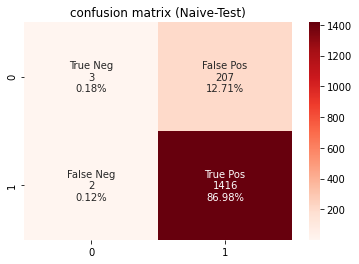

In [ ]:
#heatmap for confusion matrix (Naive-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result.flatten()/np.sum(result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Test)")

Text(0.5, 1.0, 'confusion matrix (Naive-Train)')

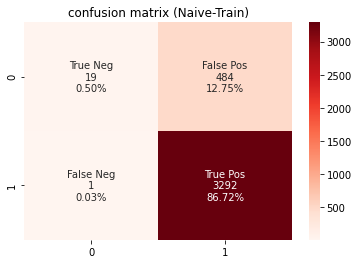

In [ ]:
#heatmap for confusion matrix (Naive-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result.flatten()/np.sum(t_result)]
t_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(2,2)
sns.heatmap(t_result, annot=t_labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Train)")

Text(0.5, 1.0, 'confusion matrix (logistic-Test)')

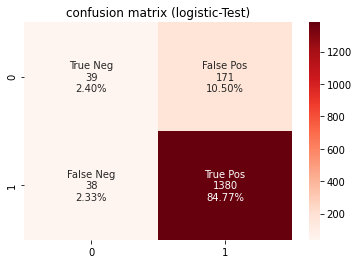

In [39]:
#heatmap for confusion matrix (logistic-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_logi.flatten()/np.sum(result_logi)]
labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_logi = np.asarray(labels_logi).reshape(2,2)
sns.heatmap(result_logi, annot=labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Test)")

Text(0.5, 1.0, 'confusion matrix (logistic-Train)')

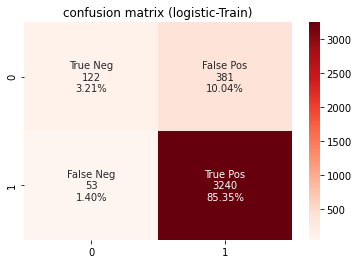

In [40]:
#heatmap for confusion matrix (logistic-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_logi.flatten()/np.sum(t_result_logi)]
t_labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_logi = np.asarray(t_labels_logi).reshape(2,2)
sns.heatmap(t_result_logi, annot=t_labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Train)")

In [ ]:
#heatmap for confusion matrix (SVC-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_svc.flatten()/np.sum(result_svc)]
labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_svc = np.asarray(labels_svc).reshape(2,2)
sns.heatmap(result_svc, annot=labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Test)")

In [ ]:
#heatmap for confusion matrix (SVC-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_svc.flatten()/np.sum(t_result_svc)]
t_labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_svc = np.asarray(t_labels_svc).reshape(2,2)
sns.heatmap(t_result_svc, annot=t_labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Train)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

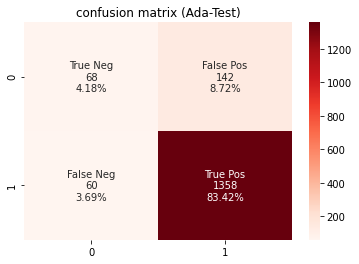

In [ ]:
#heatmap for confusion matrix (Ada-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_ada.flatten()/np.sum(result_ada)]
labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_ada = np.asarray(labels_ada).reshape(2,2)
sns.heatmap(result_ada, annot=labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

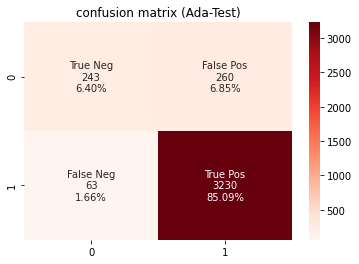

In [ ]:
#heatmap for confusion matrix (Ada-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_ada.flatten()/np.sum(t_result_ada)]
t_labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_ada = np.asarray(t_labels_ada).reshape(2,2)
sns.heatmap(t_result_ada, annot=t_labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

In [ ]:
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_test

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
3281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.803286,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.172889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
4693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

3281    1
2368    1
2631    1
2229    1
142     1
       ..
4240    1
3586    1
4554    1
2809    1
2761    1
Name: class_label, Length: 1628, dtype: int64

In [ ]:
X1_train , X1_test, y1_train, y1_test = train_test_split(combine_frame["text"], combine_frame['class_label'], test_size=0.3, random_state=0)


In [ ]:
X1_train

4693    Our guest house has an appointment for our COV...
1155    A leaked scientific report from Israel claims ...
5082    @AlphaNewsMN 1 out of 500 South Dakotans are d...
1864                                @iamslickp Covid-19 🥺
5162    What clown 🤡thought they would? \n Vaccines in...
                              ...                        
4931    As the vaccine is rolled out, here is everythi...
3264    Around one in three people who have COVID-19 a...
1653    If you’ve had a cough for three weeks or more ...
2607    From The Conversation: COVID-19 has sparked ne...
2732    @chartdata @Drake @sanbenito @Eminem @JBALVIN ...
Name: text, Length: 3796, dtype: object

In [ ]:
X1_test

3281    @the_marcoli_boy Chale ... why the COVID-19 e ...
2368    @47archi47 While we can’t share anything speci...
2631    I hope the YDP Agong takes action....\nhttps:/...
2229    Don't be surprised when you learn that politic...
142     @danwootton Hi Dan, i’m from @zwwmfilms We're ...
                              ...                        
4240    the focus\n A year ago we knew every country w...
3586    @DonSimounIbarra @PinoyAkoBlog That post was p...
4554    @BreitbartNews The prophet Dr. Fauci what is h...
2809    Arab Americans, deemed 'white' in government r...
2761    @GovWhitmer it’s February 28, 2021 and more ba...
Name: text, Length: 1628, dtype: object

In [ ]:
#---------------- Naive-Test-------------------
predicted_d = {'text': X1_test, 'class-label':y_test,'predicted': predicted }
predicted_df = pd.DataFrame(data=predicted_d)

predicted_df['class-label'] = predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df['predicted'] = predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df

,text,class-label,predicted
3281,@the_marcoli_boy Chale ... why the COVID-19 e ...,SPAM,SPAM
2368,@47archi47 While we can’t share anything speci...,SPAM,SPAM
2631,I hope the YDP Agong takes action....\nhttps:/...,SPAM,SPAM
2229,Don't be surprised when you learn that politic...,SPAM,SPAM
142,"@danwootton Hi Dan, i’m from @zwwmfilms We're ...",SPAM,SPAM
...,...,...,...
4240,the focus\n A year ago we knew every country w...,SPAM,SPAM
3586,@DonSimounIbarra @PinoyAkoBlog That post was p...,SPAM,SPAM
4554,@BreitbartNews The prophet Dr. Fauci what is h...,SPAM,SPAM
2809,"Arab Americans, deemed 'white' in government r...",SPAM,SPAM


In [ ]:
naive_test_wrong_pred = (predicted_df["class-label"]=="SPAM") & (predicted_df["predicted"]=="HAM")
naive_test_wrong_pred_df = predicted_df.loc[naive_test_wrong_pred, ["text","class-label","predicted"]]
naive_test_wrong_pred_df

,text,class-label,predicted
2009,"Whooppee....get on with it then....""FDA grants...",SPAM,HAM
2764,FDA grants emergency use authorization for Joh...,SPAM,HAM


In [ ]:
naive_test_wrong_pred_2 = (predicted_df["class-label"]=="HAM") & (predicted_df["predicted"]=="SPAM")
naive_test_wrong_pred_df_2 = predicted_df.loc[naive_test_wrong_pred_2, ["text","class-label","predicted"]]
naive_test_wrong_pred_df_2

,text,class-label,predicted
521,“While I appreciate the need to limit nonessen...,HAM,SPAM
2339,6 States Continue To Report Surge In New Covid...,HAM,SPAM
2266,"Feb 27, 2021, Since March 10, 2020, cumulative...",HAM,SPAM
1933,New COVID-19 cases hit daily record of 263 htt...,HAM,SPAM
2318,4 million doses of COVID-19 vaccine arrive Nig...,HAM,SPAM
...,...,...,...
3037,China Rolls Out Single-jab Covid Vaccine Again...,HAM,SPAM
1104,China rolls out first one-jab COVID-19 vaccine...,HAM,SPAM
23,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM,SPAM
5322,COVID-19 DAILY REPORT https://t.co/PtSJxLvxXg,HAM,SPAM


In [ ]:
naive_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_2_two.csv', encoding='utf-8-sig', index=False)
naive_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------
t_predicted_d = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted }
t_predicted_df = pd.DataFrame(data=t_predicted_d)

t_predicted_df['class-label'] = t_predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df['predicted'] = t_predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df

,text,class-label,predicted
4693,Our guest house has an appointment for our COV...,SPAM,SPAM
1155,A leaked scientific report from Israel claims ...,HAM,SPAM
5082,@AlphaNewsMN 1 out of 500 South Dakotans are d...,SPAM,SPAM
1864,@iamslickp Covid-19 🥺,SPAM,SPAM
5162,What clown 🤡thought they would? \n Vaccines in...,SPAM,SPAM
...,...,...,...
4931,"As the vaccine is rolled out, here is everythi...",SPAM,SPAM
3264,Around one in three people who have COVID-19 a...,SPAM,SPAM
1653,If you’ve had a cough for three weeks or more ...,SPAM,SPAM
2607,From The Conversation: COVID-19 has sparked ne...,SPAM,SPAM


In [ ]:
wrong_pred = (t_predicted_df["class-label"]=="SPAM") & (t_predicted_df["predicted"]=="HAM")
wrong_pred_df = t_predicted_df.loc[wrong_pred, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_2 = (t_predicted_df["class-label"]=="HAM") & (t_predicted_df["predicted"]=="SPAM")
wrong_pred_df_2 = t_predicted_df.loc[wrong_pred_2, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_df_2

,text,class-label,predicted
1155,A leaked scientific report from Israel claims ...,HAM,SPAM
3783,Vaccine success: ONE DOSE of the Oxford Covid ...,HAM,SPAM
953,COVID 19 Vaccine Merck Stops Developing Both O...,HAM,SPAM
480,China Rolls Out First Single Dose COVID-19 Vac...,HAM,SPAM
3947,Have you seen the new Cover. Distance. Clean. ...,HAM,SPAM
...,...,...,...
755,Thailand Kicks Off Covid-19 Vaccine Program Wi...,HAM,SPAM
2496,FDA Authorizes Johnson &amp; Johnson’s One-Sho...,HAM,SPAM
2046,Video: Nigeria To Receive 4 Million Doses Of C...,HAM,SPAM
2893,FAQ on Covid-19 vaccines and its importance! \...,HAM,SPAM


In [ ]:
wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_2_two.csv', encoding='utf-8-sig', index=False)
wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
wrong_pred_df

,text,class-label,predicted
4174,FDA grants emergency use authorization for Joh...,SPAM,HAM


In [ ]:
#---------------- Naive-Test-------------------

predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------

t_predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Test-------------------

correct = 0
total = predicted_df.shape[0]

for row in predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  1419
Incorrect:  209


In [ ]:
#---------------- Naive-Train-------------------

correct = 0
total = t_predicted_df.shape[0]

for row in t_predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  3311
Incorrect:  485


In [ ]:
#---------------- Logistic-Test-------------------
predicted_d_logi = {'text': X1_test, 'class-label':y_test,'predicted': predicted_logi }
predicted_df_logi = pd.DataFrame(data=predicted_d_logi)

predicted_df_logi['class-label'] = predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_logi['predicted'] = predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_logi

,text,class-label,predicted
3281,@the_marcoli_boy Chale ... why the COVID-19 e ...,SPAM,SPAM
2368,@47archi47 While we can’t share anything speci...,SPAM,SPAM
2631,I hope the YDP Agong takes action....\nhttps:/...,SPAM,SPAM
2229,Don't be surprised when you learn that politic...,SPAM,SPAM
142,"@danwootton Hi Dan, i’m from @zwwmfilms We're ...",SPAM,SPAM
...,...,...,...
4240,the focus\n A year ago we knew every country w...,SPAM,SPAM
3586,@DonSimounIbarra @PinoyAkoBlog That post was p...,SPAM,SPAM
4554,@BreitbartNews The prophet Dr. Fauci what is h...,SPAM,SPAM
2809,"Arab Americans, deemed 'white' in government r...",SPAM,SPAM


In [ ]:
logi_test_wrong_pred = (predicted_df_logi["class-label"]=="SPAM") & (predicted_df_logi["predicted"]=="HAM")
logi_test_wrong_pred_df = predicted_df_logi.loc[logi_test_wrong_pred, ["text","class-label","predicted"]]
logi_test_wrong_pred_df

,text,class-label,predicted
2009,"Whooppee....get on with it then....""FDA grants...",SPAM,HAM
2764,FDA grants emergency use authorization for Joh...,SPAM,HAM


In [ ]:
logi_test_wrong_pred_2 = (predicted_df_logi["class-label"]=="HAM") & (predicted_df_logi["predicted"]=="SPAM")
logi_test_wrong_pred_df_2 = predicted_df_logi.loc[logi_test_wrong_pred_2, ["text","class-label","predicted"]]
logi_test_wrong_pred_df_2

,text,class-label,predicted
521,“While I appreciate the need to limit nonessen...,HAM,SPAM
2339,6 States Continue To Report Surge In New Covid...,HAM,SPAM
2266,"Feb 27, 2021, Since March 10, 2020, cumulative...",HAM,SPAM
1933,New COVID-19 cases hit daily record of 263 htt...,HAM,SPAM
2318,4 million doses of COVID-19 vaccine arrive Nig...,HAM,SPAM
...,...,...,...
3037,China Rolls Out Single-jab Covid Vaccine Again...,HAM,SPAM
1104,China rolls out first one-jab COVID-19 vaccine...,HAM,SPAM
23,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM,SPAM
5322,COVID-19 DAILY REPORT https://t.co/PtSJxLvxXg,HAM,SPAM


In [ ]:
logi_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_2_two.csv', encoding='utf-8-sig', index=False)
logi_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_d_logi = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_logi }
t_predicted_df_logi = pd.DataFrame(data=t_predicted_d_logi)

t_predicted_df_logi['class-label'] = t_predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_logi['predicted'] = t_predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_logi

,text,class-label,predicted
4693,Our guest house has an appointment for our COV...,SPAM,SPAM
1155,A leaked scientific report from Israel claims ...,HAM,SPAM
5082,@AlphaNewsMN 1 out of 500 South Dakotans are d...,SPAM,SPAM
1864,@iamslickp Covid-19 🥺,SPAM,SPAM
5162,What clown 🤡thought they would? \n Vaccines in...,SPAM,SPAM
...,...,...,...
4931,"As the vaccine is rolled out, here is everythi...",SPAM,SPAM
3264,Around one in three people who have COVID-19 a...,SPAM,SPAM
1653,If you’ve had a cough for three weeks or more ...,SPAM,SPAM
2607,From The Conversation: COVID-19 has sparked ne...,SPAM,SPAM


In [ ]:
logi_train_wrong_pred = (t_predicted_df_logi["class-label"]=="HAM") & (t_predicted_df_logi["predicted"]=="SPAM")
logi_train_wrong_pred_df = t_predicted_df_logi.loc[logi_train_wrong_pred, ["text","class-label","predicted"]]
logi_train_wrong_pred_df

,text,class-label,predicted
1155,A leaked scientific report from Israel claims ...,HAM,SPAM
3783,Vaccine success: ONE DOSE of the Oxford Covid ...,HAM,SPAM
953,COVID 19 Vaccine Merck Stops Developing Both O...,HAM,SPAM
480,China Rolls Out First Single Dose COVID-19 Vac...,HAM,SPAM
3947,Have you seen the new Cover. Distance. Clean. ...,HAM,SPAM
...,...,...,...
755,Thailand Kicks Off Covid-19 Vaccine Program Wi...,HAM,SPAM
2496,FDA Authorizes Johnson &amp; Johnson’s One-Sho...,HAM,SPAM
2046,Video: Nigeria To Receive 4 Million Doses Of C...,HAM,SPAM
2893,FAQ on Covid-19 vaccines and its importance! \...,HAM,SPAM


In [ ]:
logi_train_wrong_pred_2 = (t_predicted_df_logi["class-label"]=="SPAM") & (t_predicted_df_logi["predicted"]=="HAM")
logi_train_wrong_pred_df_2 = t_predicted_df_logi.loc[logi_train_wrong_pred_2, ["text","class-label","predicted"]]
logi_train_wrong_pred_df_2

,text,class-label,predicted
4174,FDA grants emergency use authorization for Joh...,SPAM,HAM


In [ ]:
logi_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_2_two.csv', encoding='utf-8-sig', index=False)
logi_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Test-------------------
correct = 0
total = predicted_df_logi.shape[0]

for row in predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  1419
Incorrect:  209


In [ ]:
#---------------- Logistic-Train-------------------
correct = 0
total = t_predicted_df_logi.shape[0]

for row in t_predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  3311
Incorrect:  485


In [ ]:
#---------------- Logistic-Test-------------------
predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_test.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_train_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
predicted_d_svc = {'text': X1_test, 'class-label':y_test,'predicted': predicted_svc }
predicted_df_svc = pd.DataFrame(data=predicted_d_svc)

predicted_df_svc['class-label'] = predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_svc['predicted'] = predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_svc

In [ ]:
svc_test_wrong_pred = (predicted_df_svc["class-label"]=="SPAM") & (predicted_df_svc["predicted"]=="HAM")
svc_test_wrong_pred_df = predicted_df_svc.loc[svc_test_wrong_pred, ["text","class-label","predicted"]]
svc_test_wrong_pred_df

In [ ]:
svc_test_wrong_pred_2 = (predicted_df_svc["class-label"]=="HAM") & (predicted_df_svc["predicted"]=="SPAM")
svc_test_wrong_pred_df_2 = predicted_df_svc.loc[svc_test_wrong_pred_2, ["text","class-label","predicted"]]
svc_test_wrong_pred_df_2

In [ ]:
svc_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_2_two.csv', encoding='utf-8-sig', index=False)
svc_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Train-------------------
t_predicted_d_svc = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_svc }
t_predicted_df_svc = pd.DataFrame(data=t_predicted_d_svc)

t_predicted_df_svc['class-label'] = t_predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_svc['predicted'] = t_predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_svc

In [ ]:
svc_train_wrong_pred = (t_predicted_df_svc["class-label"]=="HAM") & (t_predicted_df_svc["predicted"]=="SPAM")
svc_train_wrong_pred_df = t_predicted_df_svc.loc[svc_train_wrong_pred, ["text","class-label","predicted"]]
svc_train_wrong_pred_df

In [ ]:
svc_train_wrong_pred_2 = (t_predicted_df_svc["class-label"]=="SPAM") & (t_predicted_df_svc["predicted"]=="HAM")
svc_train_wrong_pred_df_2 = t_predicted_df_svc.loc[svc_train_wrong_pred_2, ["text","class-label","predicted"]]
svc_train_wrong_pred_df_2

In [ ]:
svc_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_2_two.csv', encoding='utf-8-sig', index=False)
svc_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
correct = 0
total = predicted_df_svc.shape[0]

for row in predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

In [ ]:
#---------------- SVC-Train-------------------
correct = 0
total = t_predicted_df_svc.shape[0]

for row in t_predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

In [ ]:
#---------------- Ada-Test-------------------
predicted_d_ada = {'text': X1_test, 'class-label':y_test,'predicted': predicted_ada }
predicted_df_ada = pd.DataFrame(data=predicted_d_ada)

predicted_df_ada['class-label'] = predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_ada['predicted'] = predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_ada

,text,class-label,predicted
3281,@the_marcoli_boy Chale ... why the COVID-19 e ...,SPAM,SPAM
2368,@47archi47 While we can’t share anything speci...,SPAM,SPAM
2631,I hope the YDP Agong takes action....\nhttps:/...,SPAM,SPAM
2229,Don't be surprised when you learn that politic...,SPAM,SPAM
142,"@danwootton Hi Dan, i’m from @zwwmfilms We're ...",SPAM,SPAM
...,...,...,...
4240,the focus\n A year ago we knew every country w...,SPAM,SPAM
3586,@DonSimounIbarra @PinoyAkoBlog That post was p...,SPAM,SPAM
4554,@BreitbartNews The prophet Dr. Fauci what is h...,SPAM,SPAM
2809,"Arab Americans, deemed 'white' in government r...",SPAM,SPAM


In [ ]:
ada_test_wrong_pred = (predicted_df_ada["class-label"]=="SPAM") & (predicted_df_ada["predicted"]=="HAM")
ada_test_wrong_pred_df = predicted_df_ada.loc[svc_test_wrong_pred, ["text","class-label","predicted"]]
ada_test_wrong_pred_df

,text,class-label,predicted
4097,@smitaparikh2 Kudos to all delhi warriors. Pls...,SPAM,HAM
3931,#JohnsonAndJohnson's single shot vaccine is AP...,SPAM,HAM
825,Report from an employee at Volvo Trucks North ...,SPAM,HAM
405,#SaudiArabia recorded new 322 #COVID-19 cases ...,SPAM,HAM
4697,While pundits in West wonder whether Pope Fran...,SPAM,HAM
1008,@WittGall @FinancialTimes The Palestinian Auth...,SPAM,HAM
2374,"COVID-19 ALERT! IDSP BULLETIN, DIRECTORATE OF ...",SPAM,HAM
4871,COVID-19: Nigeria To Receive About 4m Doses Of...,SPAM,HAM
2189,"@yoabbaabba 15th February, my father passed aw...",SPAM,HAM
3019,COVID-19 vaccine: Complete list of private hos...,SPAM,HAM


In [ ]:
ada_test_wrong_pred_2 = (predicted_df_ada["class-label"]=="HAM") & (predicted_df_ada["predicted"]=="SPAM")
ada_test_wrong_pred_df_2 = predicted_df_ada.loc[ada_test_wrong_pred_2, ["text","class-label","predicted"]]
ada_test_wrong_pred_df_2

,text,class-label,predicted
521,“While I appreciate the need to limit nonessen...,HAM,SPAM
2266,"Feb 27, 2021, Since March 10, 2020, cumulative...",HAM,SPAM
1933,New COVID-19 cases hit daily record of 263 htt...,HAM,SPAM
1644,Rapid COVID-19 testing extending to pupils' fa...,HAM,SPAM
39,(CNS) Orange County COVID-19 Hospitalizations ...,HAM,SPAM
...,...,...,...
1746,Many hospitals are still overwhelmed by COVID-...,HAM,SPAM
900,COVID-19 Vaccines 🇮🇪\n (Thursday / 25-02-21)\n...,HAM,SPAM
3001,The Conversation: How does the Johnson &amp; J...,HAM,SPAM
23,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM,SPAM


In [ ]:
ada_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_2_two.csv', encoding='utf-8-sig', index=False)
ada_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Train-------------------
t_predicted_d_ada = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_ada }
t_predicted_df_ada = pd.DataFrame(data=t_predicted_d_ada)

t_predicted_df_ada['class-label'] = t_predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_ada['predicted'] = t_predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_ada

,text,class-label,predicted
4693,Our guest house has an appointment for our COV...,SPAM,SPAM
1155,A leaked scientific report from Israel claims ...,HAM,HAM
5082,@AlphaNewsMN 1 out of 500 South Dakotans are d...,SPAM,SPAM
1864,@iamslickp Covid-19 🥺,SPAM,SPAM
5162,What clown 🤡thought they would? \n Vaccines in...,SPAM,SPAM
...,...,...,...
4931,"As the vaccine is rolled out, here is everythi...",SPAM,SPAM
3264,Around one in three people who have COVID-19 a...,SPAM,SPAM
1653,If you’ve had a cough for three weeks or more ...,SPAM,SPAM
2607,From The Conversation: COVID-19 has sparked ne...,SPAM,SPAM


In [ ]:
ada_train_wrong_pred = (t_predicted_df_ada["class-label"]=="HAM") & (t_predicted_df_ada["predicted"]=="SPAM")
ada_train_wrong_pred_df = t_predicted_df_ada.loc[ada_train_wrong_pred, ["text","class-label","predicted"]]
ada_train_wrong_pred_df

,text,class-label,predicted
3783,Vaccine success: ONE DOSE of the Oxford Covid ...,HAM,SPAM
953,COVID 19 Vaccine Merck Stops Developing Both O...,HAM,SPAM
3947,Have you seen the new Cover. Distance. Clean. ...,HAM,SPAM
2678,China has donated Covid-19 vaccines to at leas...,HAM,SPAM
4716,28 February 2021\n\nOn this last day of the mo...,HAM,SPAM
...,...,...,...
4484,Another 204 COVID-19 cases have been detected ...,HAM,SPAM
151,"Americans over 65, who have had priority acces...",HAM,SPAM
2496,FDA Authorizes Johnson &amp; Johnson’s One-Sho...,HAM,SPAM
2046,Video: Nigeria To Receive 4 Million Doses Of C...,HAM,SPAM


In [ ]:
ada_train_wrong_pred_2 = (t_predicted_df_ada["class-label"]=="SPAM") & (t_predicted_df_ada["predicted"]=="HAM")
ada_train_wrong_pred_df_2 = t_predicted_df_ada.loc[ada_train_wrong_pred_2, ["text","class-label","predicted"]]
ada_train_wrong_pred_df_2

,text,class-label,predicted
927,"""Will Twitter follow suit"" #socialmedia Facebo...",SPAM,HAM
4156,FDA Approves Johnson &amp;amp; Johnson Vaccine...,SPAM,HAM
2436,@JordanSchachtel It is really funny that a new...,SPAM,HAM
2104,Thailand also begins Covid-19 vaccination with...,SPAM,HAM
1989,US approves Johnson &amp; Johnson single-dose ...,SPAM,HAM
...,...,...,...
112,U.S. approves Johnson &amp; Johnson's single-d...,SPAM,HAM
164,Delhi Chalo 4 Sushant 🙏 Have all Covid -19 Pre...,SPAM,HAM
3695,"#Iraq records new 3,248 Covid-19 cases, tally ...",SPAM,HAM
5335,There are openings for Brooklyn residents for ...,SPAM,HAM


In [ ]:
ada_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_2_two.csv', encoding='utf-8-sig', index=False)
ada_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_1_two.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Test-------------------
correct = 0
total = predicted_df_ada.shape[0]

for row in predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  1426
Incorrect:  202


In [ ]:
#---------------- Ada-Train-------------------
correct = 0
total = t_predicted_df_ada.shape[0]

for row in t_predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  3473
Incorrect:  323
